<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data(y_hat)_add_delta_(_2)_n60_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_-2'

In [4]:
os.listdir(base_path)

['data_add_delta_-2_n20.csv',
 'data_add_delta_-2_n30.csv',
 'data_add_delta_-2_n60.csv',
 'data_add_delta_-2_n120.csv',
 'data_add_delta_-2_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-2_n60.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,48.269230,46.632372,34.778764,0.011635,139.692001,139.691710,0.000291
1,0.0,1.0,95.820803,70.443885,46.961367,0.016104,223.242158,223.220415,0.021743
2,0.0,2.0,47.253725,83.802756,32.973787,-0.014554,174.015715,174.034043,-0.018328
3,0.0,3.0,86.036957,45.938341,67.621278,0.003656,209.600232,209.594173,0.006060
4,0.0,4.0,41.071115,75.564230,32.232245,0.006305,158.873894,158.874530,-0.000636
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,98.282315,85.859063,25.376553,0.020230,219.538161,219.526273,0.011888
59996,999.0,56.0,47.803060,62.154261,49.297226,0.020681,169.275228,169.253221,0.022007
59997,999.0,57.0,56.276963,30.828961,94.722812,-0.009493,191.819243,191.813120,0.006123
59998,999.0,58.0,93.089537,87.133481,45.025762,-0.024868,235.223912,235.253668,-0.029756


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,48.269230,46.632372,34.778764,0.011635,139.692001,139.691710,0.000291
1,0.0,1.0,95.820803,70.443885,46.961367,0.016104,223.242158,223.220415,0.021743
2,0.0,2.0,47.253725,83.802756,32.973787,-0.014554,174.015715,174.034043,-0.018328
3,0.0,3.0,86.036957,45.938341,67.621278,0.003656,209.600232,209.594173,0.006060
4,0.0,4.0,41.071115,75.564230,32.232245,0.006305,158.873894,158.874530,-0.000636
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,98.282315,85.859063,25.376553,0.020230,219.538161,219.526273,0.011888
59996,999.0,56.0,47.803060,62.154261,49.297226,0.020681,169.275228,169.253221,0.022007
59997,999.0,57.0,56.276963,30.828961,94.722812,-0.009493,191.819243,191.813120,0.006123
59998,999.0,58.0,93.089537,87.133481,45.025762,-0.024868,235.223912,235.253668,-0.029756


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    48.269230  46.632372  34.778764  0.011635  139.692001   
      1.0    95.820803  70.443885  46.961367  0.016104  223.242158   
      2.0    47.253725  83.802756  32.973787 -0.014554  174.015715   
      3.0    86.036957  45.938341  67.621278  0.003656  209.600232   
      4.0    41.071115  75.564230  32.232245  0.006305  158.873894   
...                ...        ...        ...       ...         ...   
999.0 55.0   98.282315  85.859063  25.376553  0.020230  219.538161   
      56.0   47.803060  62.154261  49.297226  0.020681  169.275228   
      57.0   56.276963  30.828961  94.722812 -0.009493  191.819243   
      58.0   93.089537  87.133481  45.025762 -0.024868  235.223912   
      59.0   97.901688  80.289961  73.140081  0.006537  261.338266   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    139.691710  0.000291  
      1.0    223.220415  0.021743  
      2.0    174.034043 -0.018328  
      3.0    209.594173  0.006060  
      4.0    158.874530 -0.000636  
...                 ...       ...  
999.0 55.0   219.526273  0.011888  
      56.0   169.253221  0.022007  
      57.0   191.813120  0.006123  
      58.0   235.253668 -0.029756  
      59.0   261.330178  0.008088  

[60000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    48.269230  46.632372  34.778764  0.011635  139.692001   
      1.0    95.820803  70.443885  46.961367  0.016104  223.242158   
      2.0    47.253725  83.802756  32.973787 -0.014554  174.015715   
      3.0    86.036957  45.938341  67.621278  0.003656  209.600232   
      4.0    41.071115  75.564230  32.232245  0.006305  158.873894   
...                ...        ...        ...       ...         ...   
999.0 55.0   98.282315  85.859063  25.376553  0.020230  219.538161   
      56.0   47.803060  62.154261  49.297226  0.020681  169.275228   
      57.0   56.276963  30.828961  94.722812 -0.009493  191.819243   
      58.0   93.089537  87.133481  45.025762 -0.024868  235.223912   
      59.0   97.901688  80.289961  73.140081  0.006537  261.338266   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    139.691710  0.000291  
      1.0    223.220415  0.021743  
      2.0    174.034043 -0.018328  
      3.0    209.594173  0.006060  
      4.0    158.874530 -0.000636  
...                 ...       ...  
999.0 55.0   219.526273  0.011888  
      56.0   169.253221  0.022007  
      57.0   191.813120  0.006123  
      58.0   235.253668 -0.029756  
      59.0   261.330178  0.008088  

[60000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,48.269230,46.632372,34.778764,0.011635,139.692001,139.691710,0.000291
1,0.0,1.0,95.820803,70.443885,46.961367,0.016104,223.242158,223.220415,0.021743
2,0.0,2.0,47.253725,83.802756,32.973787,-0.014554,174.015715,174.034043,-0.018328
3,0.0,3.0,86.036957,45.938341,67.621278,0.003656,209.600232,209.594173,0.006060
4,0.0,4.0,41.071115,75.564230,32.232245,0.006305,158.873894,158.874530,-0.000636
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,98.282315,85.859063,25.376553,0.020230,219.538161,219.526273,0.011888
59996,999.0,56.0,47.803060,62.154261,49.297226,0.020681,169.275228,169.253221,0.022007
59997,999.0,57.0,56.276963,30.828961,94.722812,-0.009493,191.819243,191.813120,0.006123
59998,999.0,58.0,93.089537,87.133481,45.025762,-0.024868,235.223912,235.253668,-0.029756


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    48.269230  46.632372  34.778764  0.011635  139.692001   
      1.0    95.820803  70.443885  46.961367  0.016104  223.242158   
      2.0    47.253725  83.802756  32.973787 -0.014554  174.015715   
      3.0    86.036957  45.938341  67.621278  0.003656  209.600232   
      4.0    41.071115  75.564230  32.232245  0.006305  158.873894   
...                ...        ...        ...       ...         ...   
999.0 55.0   98.282315  85.859063  25.376553  0.020230  219.538161   
      56.0   47.803060  62.154261  49.297226  0.020681  169.275228   
      57.0   56.276963  30.828961  94.722812 -0.009493  191.819243   
      58.0   93.089537  87.133481  45.025762 -0.024868  235.223912   
      59.0   97.901688  80.289961  73.140081  0.006537  261.338266   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    139.691710  0.000291  
      1.0    223.220415  0.021743  
      2.0    174.034043 -0.018328  
      3.0    209.594173  0.006060  
      4.0    158.874530 -0.000636  
...                 ...       ...  
999.0 55.0   219.526273  0.011888  
      56.0   169.253221  0.022007  
      57.0   191.813120  0.006123  
      58.0   235.253668 -0.029756  
      59.0   261.330178  0.008088  

[60000 rows x 7 columns]

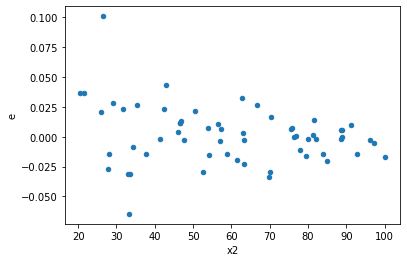

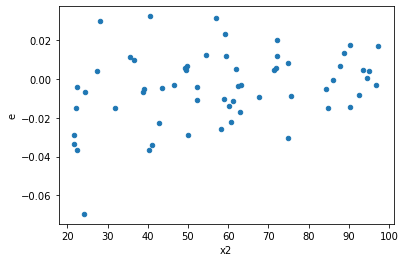

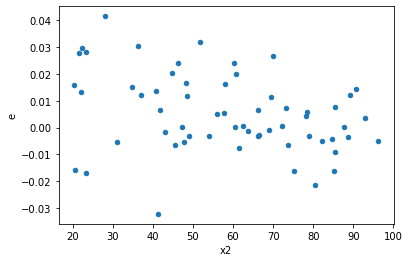

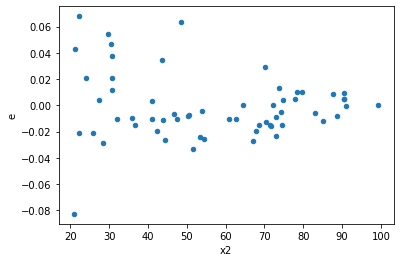

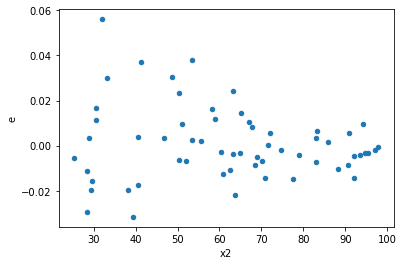

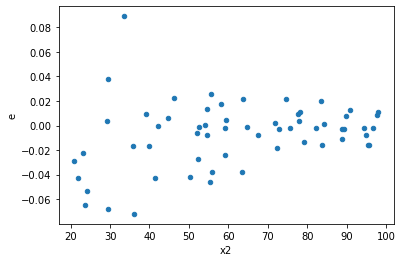

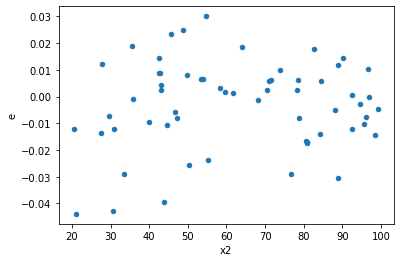

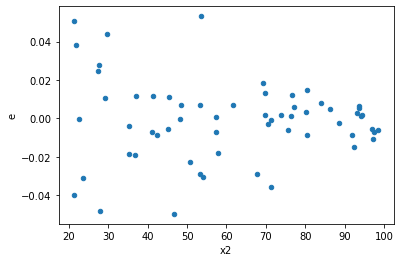

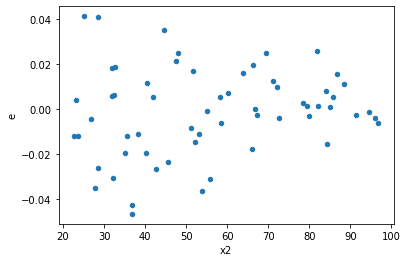

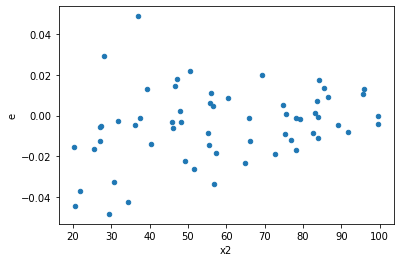

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)

    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
2.0,21.0,21.0,0.002564426492515164,0.005316570855639341,0.00012211554726262685,0.00025317004074473055,2.0732007219379884,0.1024139035092293,0.9487930482453854,0.05120695175461465,Reject005=1 : Homoscedasticity
30.0,21.0,21.0,0.005703891205936604,0.009951443021829392,0.0002716138669493621,0.0004738782391347329,1.7446761627346503,0.21046893982710202,0.894765530086449,0.10523446991355101,Reject005=1 : Homoscedasticity
51.0,21.0,21.0,0.0071315543503598245,0.010782159368878674,0.0003395978262076107,0.000513436160422794,1.5118947201649886,0.35098995913491526,0.8245050204325424,0.17549497956745763,Reject005=1 : Homoscedasticity
52.0,21.0,21.0,0.007045646067571745,0.009020399580338963,0.0003355069555986545,0.00042954283715899825,1.2802799762900678,0.5763453038525186,0.7118273480737407,0.2881726519262593,Reject005=1 : Homoscedasticity
71.0,21.0,21.0,0.0067774669958318,0.007621066336562152,0.0003227365236110381,0.0003629079207886739,1.1244711838876047,0.7905915224723399,0.6047042387638301,0.39529576123616994,Reject005=1 : Homoscedasticity
79.0,21.0,21.0,0.008060166730381572,0.008754361997667076,0.00038381746335150343,0.00041687438084128935,1.08612666344343,0.8516327067251468,0.5741836466374266,0.4258163533625734,Reject005=1 : Homoscedasticity
80.0,21.0,21.0,0.008548873187251206,0.009191365584812629,0.0004070891993929146,0.00043768407546726805,1.0751552144345247,0.8696867904431493,0.5651566047784253,0.43484339522157467,Reject005=1 : Homoscedasticity
81.0,21.0,21.0,0.005164707451934996,0.006423027057759626,0.00024593845009214266,0.00030585843132188695,1.2436381184287972,0.62186916080607,0.689065419596965,0.310934580403035,Reject005=1 : Homoscedasticity
91.0,21.0,21.0,0.009657208455828525,0.010970721724611762,0.0004598670693251678,0.0005224153202196077,1.136013763686594,0.7728535819706681,0.6135732090146659,0.38642679098533406,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,21.0,21.0,0.01336411406009339,0.0047044727634448676,0.0006363863838139709,0.0002240225125449937,0.3520227934519733,0.020671493763314435,Reject005=0 : Heteroscedasticity
1.0,21.0,21.0,0.008424893938010177,0.004017393600323914,0.00040118542561953227,0.00019130445715828163,0.47684797338502244,0.0972378440832456,Reject005=1 : Homoscedasticity
2.0,21.0,21.0,0.002564426492515164,0.005316570855639341,0.00012211554726262685,0.00025317004074473055,2.0732007219379884,0.1024139035092293,Reject005=1 : Homoscedasticity
3.0,21.0,21.0,0.011086708154643972,0.009025145344853231,0.0005279384835544748,0.00042976882594539196,0.8140509535350944,0.6416373533316228,Reject005=1 : Homoscedasticity
4.0,21.0,21.0,0.007693812534971258,0.0032494431373984935,0.0003663720254748218,0.00015473538749516635,0.42234498470407983,0.054490135930321947,Reject005=1 : Homoscedasticity
5.0,21.0,21.0,0.020366914111091084,0.005480364378344852,0.0009698530529090992,0.0002609697323021358,0.2690817248235188,0.004027501352043376,Reject005=0 : Heteroscedasticity
6.0,21.0,21.0,0.005655488147986653,0.003879413310158083,0.00026930895942793587,0.00018473396715038492,0.6859555194257015,0.3947745060253871,Reject005=1 : Homoscedasticity
7.0,21.0,21.0,0.008443054629651192,0.006040007128749439,0.0004020502204595806,0.0002876193870833066,0.7153817419986266,0.44927571538967287,Reject005=1 : Homoscedasticity
8.0,21.0,21.0,0.009801868913775193,0.0025781325516137615,0.0004667556625607235,0.00012276821674351245,0.26302458993208394,0.0034695194368563704,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    571
Reject005=1 : Homoscedasticity      429
Name: Result_test, dtype: int64